(-0.1, 1.1)

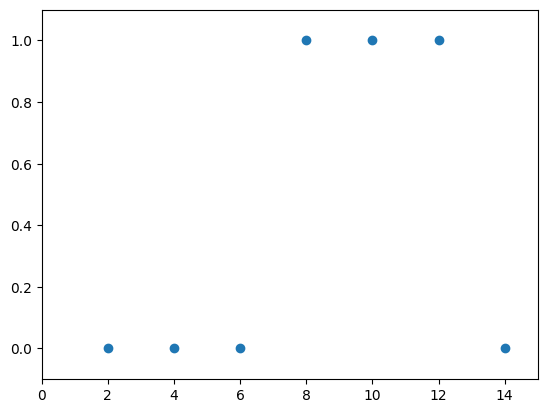

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 0]]

x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프로 나타내 봅니다.
plt.scatter(x, y)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [ ]:
# 기울기 a와 절편 b의 값을 초기화 합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.05

#시그모이드 함수를 정의합니다.
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

# 오차 값들의 제곱 평균
def error_sum():
  return ((y_data - sigmoid(a * x_data + b)) ** 2).mean()

# from list to vector
x_data = np.array(x)
y_data = np.array(y)

loss = []
#경사 하강법을 실행합니다.
for i in range(10001):
    a_diff = (1 / len(x_data)) * sum(x_data * (sigmoid(a * x_data + b) - y_data))
    b_diff = (1 / len(x_data)) * sum(sigmoid(a * x_data + b) - y_data)
    a = a - lr * a_diff
    b = b - lr * b_diff
    loss.append(error_sum())

    if i % 1000 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        print("Error value: %.04f" % loss[i])

epoch=0, 기울기=0.0143, 절편=-0.0036
Error value: 0.2488
epoch=1000, 기울기=0.2108, 절편=-1.9640
Error value: 0.2004
epoch=2000, 기울기=0.2412, 절편=-2.2687
Error value: 0.2004
epoch=3000, 기울기=0.2473, 절편=-2.3308
Error value: 0.2005
epoch=4000, 기울기=0.2487, 절편=-2.3442
Error value: 0.2006
epoch=5000, 기울기=0.2489, 절편=-2.3470
Error value: 0.2006
epoch=6000, 기울기=0.2490, 절편=-2.3477
Error value: 0.2006
epoch=7000, 기울기=0.2490, 절편=-2.3478
Error value: 0.2006
epoch=8000, 기울기=0.2490, 절편=-2.3478
Error value: 0.2006
epoch=9000, 기울기=0.2490, 절편=-2.3478
Error value: 0.2006
epoch=10000, 기울기=0.2490, 절편=-2.3479
Error value: 0.2006


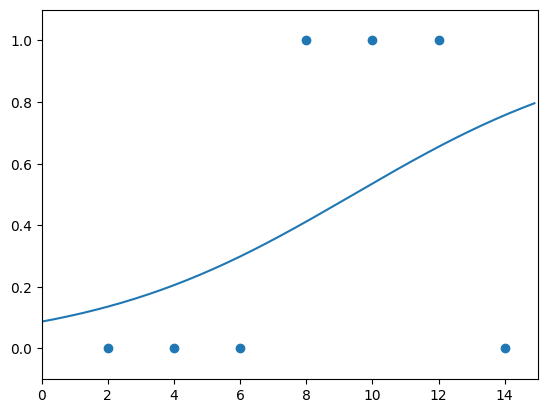

In [ ]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

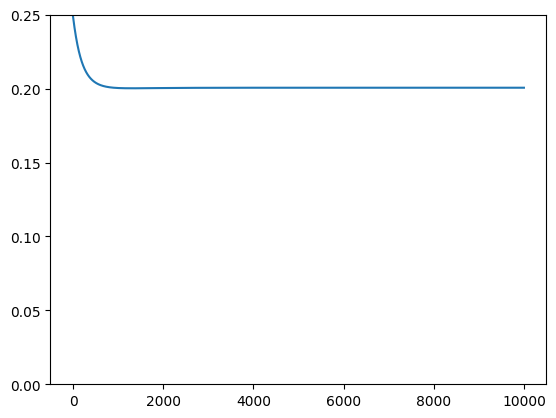

Input: 2.0, Real: 0.0, Expect: 0.1359
Input: 4.0, Real: 0.0, Expect: 0.2056
Input: 6.0, Real: 0.0, Expect: 0.2987
Input: 8.0, Real: 1.0, Expect: 0.4120
Input: 10.0, Real: 1.0, Expect: 0.5356
Input: 12.0, Real: 1.0, Expect: 0.6549
Input: 14.0, Real: 0.0, Expect: 0.7574


In [ ]:
# 예측 함수
plt.ylim(0.0, 0.25)
x_range = (np.arange(0, 10000, 1))
plt.plot(np.arange(0, 10000, 1), np.array([loss[i] for i in x_range]))
plt.show()

# 입력에 대한 예측 츌력 값
predict = sigmoid(a * x_data + b)
j = 0
for i in data:
  print("Input: %.01f, Real: %.01f, Expect: %.04f" % (i[0], i[1], predict[j]))
  j += 1


- 오차가 커지고 epoch가 높아져도 기울기와 error 값이 거의 변화가 생기지 않았다.
------
- epoch: 훈련 데이터셋에 포함된 모든 데이터들이 한번씩 모델을 통과한 횟수 -> 모든 학습 데이터셋을 학습하는 횟수 의미.
 - if epoch 가 10, 학습 데이터 셋 a를 10회 모델에 학습 시켰다는 의미
 - epoch가 높아질수록, 다양한 무작위 가중치로 학습을 해보는 것이므로 적합한 파라미터를 찾을 확률이 올라감
 - 지나치게 높이게 되면 과적합(Overfitting)되어 다른 데이터에 대해 제대로 된 예측 불가.